In [14]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.cluster import KMeans
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']



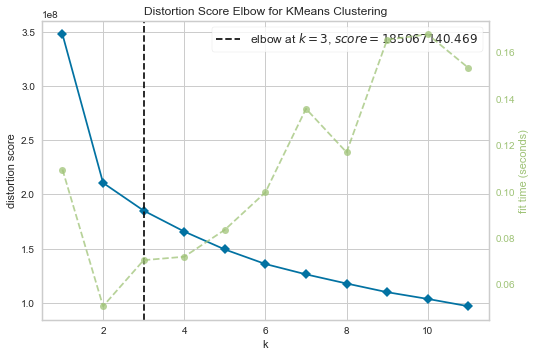

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Using the elbow method to find the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [18]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)

X_scaled = scaler.fit_transform(X)

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')


 Number of Clusters: 2 | silhouette_score_average : 0.1255100220076295
 Number of Clusters: 3 | silhouette_score_average : 0.11301583380690138
 Number of Clusters: 4 | silhouette_score_average : 0.10986829560226467
 Number of Clusters: 5 | silhouette_score_average : 0.10940104533941616
 Number of Clusters: 6 | silhouette_score_average : 0.11144193054595597
 Number of Clusters: 7 | silhouette_score_average : 0.11084028907354053
 Number of Clusters: 8 | silhouette_score_average : 0.1131723880662989
 Number of Clusters: 9 | silhouette_score_average : 0.11649758900046506
 Number of Clusters: 2 | Number of Negative Values: 13
 Number of Clusters: 3 | Number of Negative Values: 41
 Number of Clusters: 4 | Number of Negative Values: 67
 Number of Clusters: 5 | Number of Negative Values: 44
 Number of Clusters: 6 | Number of Negative Values: 76
 Number of Clusters: 7 | Number of Negative Values: 78
 Number of Clusters: 8 | Number of Negative Values: 75
 Number of Clusters: 9 | Number of Negati

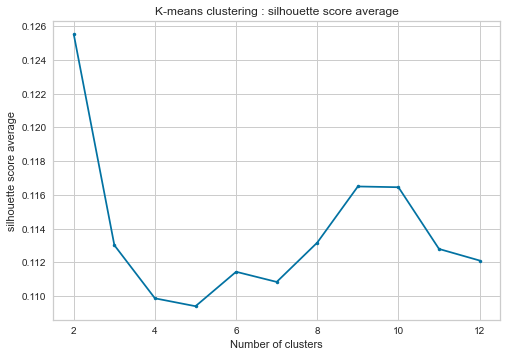

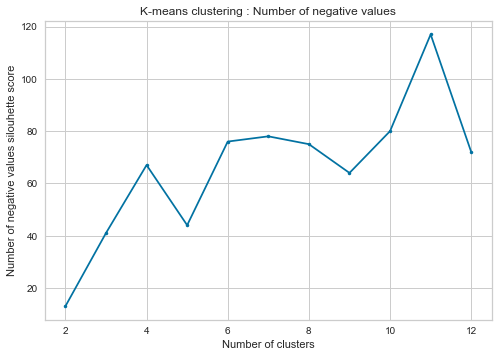

In [50]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
negative_values = [0 for i in range(2,13)]

silhouette_score_average_list = []

# remember, anything past 15 looked really good based on the inertia
number_of_clusters = [i for i in range(2,13)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for i in number_of_clusters:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    silhouette_score_average_list.append(silhouette_score_average)
    
    # iterate through to find any negative values
    for k in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if k < 0:
            negative_values[i-2] += 1


fig1, ax1 = plt.subplots()
ax1.set_title('K-means clustering : silhouette score average')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('silhouette score average')
ax1.plot(number_of_clusters, silhouette_score_average_list, marker=".")

fig, ax = plt.subplots()
ax.set_title('K-means clustering : Number of negative values')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Number of negative values silouhette score")
ax.plot(number_of_clusters, negative_values, marker=".")

plt.show()


In [53]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score
for i in range(2,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X)

    print('v_measure_score {} :{}'.format(i,v_measure_score(y,y_pred1,beta =1.0)))
    
# print('homogeneity_score :',homogeneity_score(y,y_pred1))
# print('completeness_score :',completeness_score(y,y_pred1))

v_measure_score 2 :0.0018150734811220605
v_measure_score 3 :0.004110427614377699
v_measure_score 4 :0.004154516482482571
v_measure_score 5 :0.005562976755463309
v_measure_score 6 :0.005185411469921279


time for running the algorithm = 6.39017046400113 s


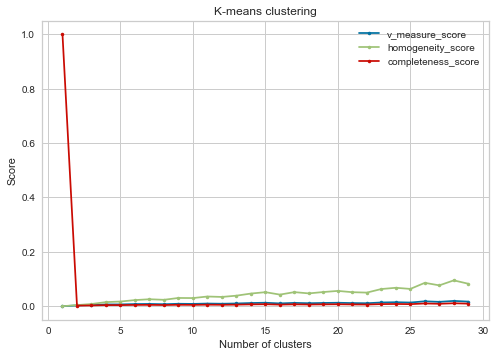

In [52]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X_scaled)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()

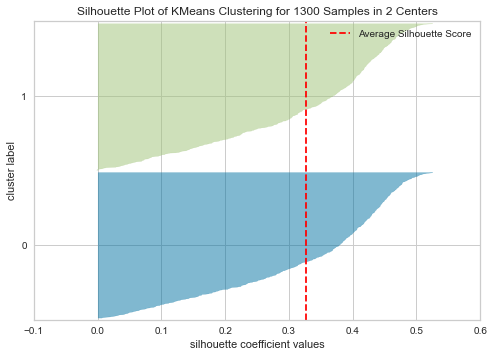

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1300 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model = KMeans(2, random_state=32)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

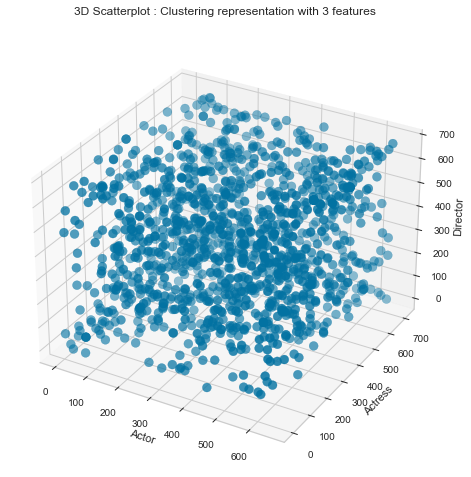

In [35]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ='3d')

sctt = ax.scatter(pd.DataFrame(df, columns =['Actor']),
                    pd.DataFrame(df, columns =['Actress']),
                    pd.DataFrame(df, columns =['Director']),
                    s=80)

plt.title("3D Scatterplot : Clustering representation with 3 features",pad = 20)
ax.set_xlabel('Actor')
ax.set_ylabel('Actress')
ax.set_zlabel('Director')
plt.savefig('3d_scatterplot.png')

In [48]:
kmeans = KMeans(n_clusters = 3).fit(X_scaled)

b = io.open('Movie Dataset.csv', encoding='latin-1')
df_cluster = pd.read_csv(b)
df_cluster = df_cluster.take([i for i in range(1300)], axis = 0)
df_cluster = df_cluster.apply(LabelEncoder().fit_transform)
df_cluster.loc[:,"cluster"] = kmeans.labels_
print(df_cluster.head())

# save the data
df_cluster.to_csv('Movie Dataset_Kmeans.csv', index=False)

   Year  Length  Title  Subject  Actor  Actress  Director  Popularity  Awards  \
0    67      65   1161        2     30        0         8          68       0   
1    68      67    550        2     69        0         8          68       0   
2    60      58    317        6    620        1       151          79       0   
3    56      76    299        0    127        1       367           6       0   
4    55      48    313        4    241        1       393          14       0   

   cluster  
0        1  
1        1  
2        1  
3        0  
4        0  
